<a href="https://colab.research.google.com/github/BenUCL/Reef-acoustics-and-AI/blob/main/Code/UMAP_Aus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UMAP plot full datasets**
This script contains code blocks which import the csv files of features and create UMAP embeddings and plots with these. Blocks for each method and task is are indicated in bold headers.



In [ ]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 7.0 MB/s 
     |████████████████████████████████| 1.1 MB 57.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7af4751f9d51fbd5d7b6deb36c41d63b1c48c0e89b92525b485d05a12002e528
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=a18711143051a4e5f886c10be06e278e8bf587fa09b001f047f706895adde23a
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 35.4 MB/s 
     |████████████████████████████████| 76 kB 5.9 MB/s 

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap.umap_ as umap
import umap.plot
#from umap import plot
%matplotlib inline

import random

random.seed(123)

# Ecoacoustic Indices

In [ ]:
# Uppload the csv of features and copy the path
indices_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/compound_index_aus.csv'

data = pd.read_csv (indices_path) #load dataframe
indices_df = data.reset_index() #put index in order
indices_df = indices_df.iloc[: , 2:] #remove unnecessary index


# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[0][0:5]
    return t

class_type = []
for i in indices_df['minute']:
  class_type.append(get_class(i))

# rename sites so they follow order on map more easily
new_names = ['Site A' if x=='SiteA' else x for x in class_type]
new_names = ['Site G' if x=='SiteB' else x for x in new_names]
new_names = ['Site D' if x=='SiteC' else x for x in new_names]
new_names = ['Site E' if x=='SiteD' else x for x in new_names]
new_names = ['Site B' if x=='SiteE' else x for x in new_names]
new_names = ['Site I' if x=='SiteF' else x for x in new_names]
new_names = ['Site H' if x=='SiteG' else x for x in new_names]
new_names = ['Site L' if x=='SiteH' else x for x in new_names]
new_names = ['Site C' if x=='SiteI' else x for x in new_names]
new_names = ['Site F' if x=='SiteJ' else x for x in new_names]
new_names = ['Site J' if x=='SiteK' else x for x in new_names]
new_names = ['Site K' if x=='SiteL' else x for x in new_names]

#add class column
indices_df.insert(1, 'Habitat', new_names)

# Check the class column was added 
indices_df.head()

,minute,Habitat,fish_ACI,fish_ACI_std,fish_ADI,fish_ADI_std,fish_H,fish_H_std,fish_Hf,fish_Hf_std,...,full_H,full_H_std,full_Hf,full_Hf_std,full_M,full_M_std,full_BI,full_BI_std,NDSI,NDSI_std
0,SiteJdeployment2.1677983769.181103032034.wav,Site F,179.372677,26.483996,2.192782,0.063717,0.999843,0.000144,0.481993,0.030042,...,0.999930,0.000041,0.726764,0.019765,0.002191,0.000152,6.620203,1.060968,0.695277,0.157566
1,SiteAdeployment1.805322778.181023172733.wav,Site A,168.801850,25.504564,1.969023,0.395328,0.999686,0.000299,0.445248,0.056819,...,0.999946,0.000034,0.733206,0.039498,0.000549,0.000051,3.684730,0.750008,0.547568,0.218633
2,SiteIdeployment2.805322778.181102073302.wav,Site C,174.988720,24.714481,2.197048,0.295056,0.999771,0.000238,0.497067,0.028419,...,0.999944,0.000031,0.731974,0.035967,0.000685,0.000051,4.032168,1.002873,0.574645,0.199514
3,SiteDdeployment4.805322778.181123173922.wav,Site E,165.651071,17.444454,1.960197,0.139087,0.999693,0.000213,0.427126,0.043692,...,0.999937,0.000035,0.743762,0.024463,0.000573,0.000035,4.024412,0.804414,0.557476,0.186468
4,SiteEdeployment6.1677983769.181209085140.wav,Site B,180.360927,20.778196,2.119658,0.095857,0.999758,0.000208,0.465938,0.038046,...,0.999944,0.000028,0.751055,0.020132,0.000948,0.000076,3.399768,0.976760,0.596916,0.143404


In [ ]:
# Create UMAP
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(indices_df.iloc[:,2:40])

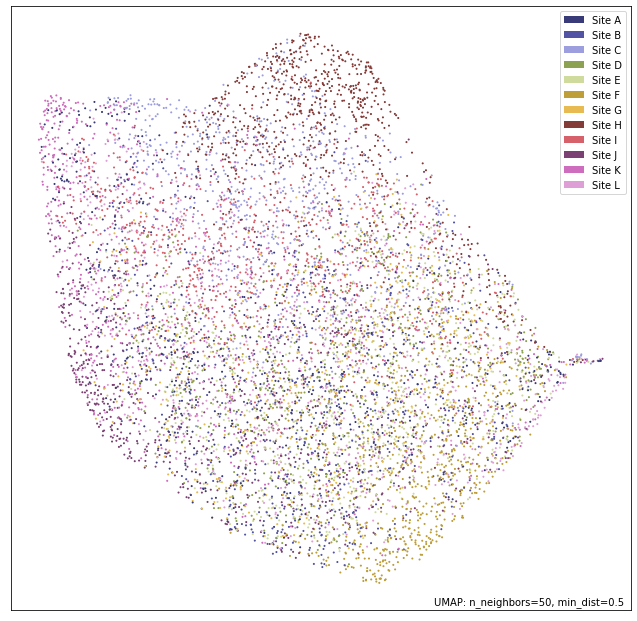

In [ ]:
# plot the UMAP
umap.plot.points(mapper, labels=indices_df.Habitat, theme = 'red')

# Pretrained Network 

In [ ]:
# Uppload the csv of features and copy the path
pretrained_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/pretrained_CNN_aus.csv'

data = pd.read_csv (pretrained_path) #load dataframe
temp_df = data.reset_index() #put index in order
temp_df = temp_df.iloc[: , 2:] #remove unnecessary index
temp_df = temp_df.T #transpose to match indices format
temp_df = temp_df.reset_index() #re-add the index
pretrained_df = temp_df.rename(columns={"index": "minute"})

# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    n1 = filename.split(".")[0][0:5]
    n2 = 'Site' + ' ' + n1[4]
    return n2

class_type = []
for i in pretrained_df['minute']:
  class_type.append(get_class(i))

# rename sites so they follow order on map more easily
new_names = ['Site A' if x=='SiteA' else x for x in class_type]
new_names = ['Site G' if x=='SiteB' else x for x in new_names]
new_names = ['Site D' if x=='SiteC' else x for x in new_names]
new_names = ['Site E' if x=='SiteD' else x for x in new_names]
new_names = ['Site B' if x=='SiteE' else x for x in new_names]
new_names = ['Site I' if x=='SiteF' else x for x in new_names]
new_names = ['Site H' if x=='SiteG' else x for x in new_names]
new_names = ['Site L' if x=='SiteH' else x for x in new_names]
new_names = ['Site C' if x=='SiteI' else x for x in new_names]
new_names = ['Site F' if x=='SiteJ' else x for x in new_names]
new_names = ['Site J' if x=='SiteK' else x for x in new_names]
new_names = ['Site K' if x=='SiteL' else x for x in new_names]

pretrained_df.insert(1, 'Habitat', new_names)

# Check the class column was added 
pretrained_df.head()

,minute,Habitat,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,SiteJdeployment2.1677983769.181103032034.wav,Site J,0.000929,0.093042,0.285380,0.210208,0.000000,0.0,0.0,0.006659,...,0.0,0.023046,0.000220,0.000000,0.000000,0.225300,0.304314,0.0,0.0,0.0
1,SiteAdeployment1.805322778.181023172733.wav,Site A,0.030780,0.100007,0.408427,0.050889,0.000000,0.0,0.0,0.002414,...,0.0,0.060092,0.010739,0.000000,0.028925,0.244283,0.167082,0.0,0.0,0.0
2,SiteIdeployment2.805322778.181102073302.wav,Site I,0.023870,0.043412,0.331813,0.121506,0.000000,0.0,0.0,0.000000,...,0.0,0.043277,0.000077,0.000000,0.016917,0.357364,0.186497,0.0,0.0,0.0
3,SiteDdeployment4.805322778.181123173922.wav,Site D,0.039953,0.076123,0.304760,0.088957,0.001289,0.0,0.0,0.014608,...,0.0,0.078101,0.053534,0.001675,0.013040,0.177259,0.129732,0.0,0.0,0.0
4,SiteEdeployment6.1677983769.181209085140.wav,Site E,0.005541,0.105616,0.485045,0.074837,0.000000,0.0,0.0,0.000000,...,0.0,0.056985,0.008627,0.000000,0.020391,0.282245,0.129462,0.0,0.0,0.0


In [ ]:
# Create UMAP
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(pretrained_df.iloc[:,2:130])

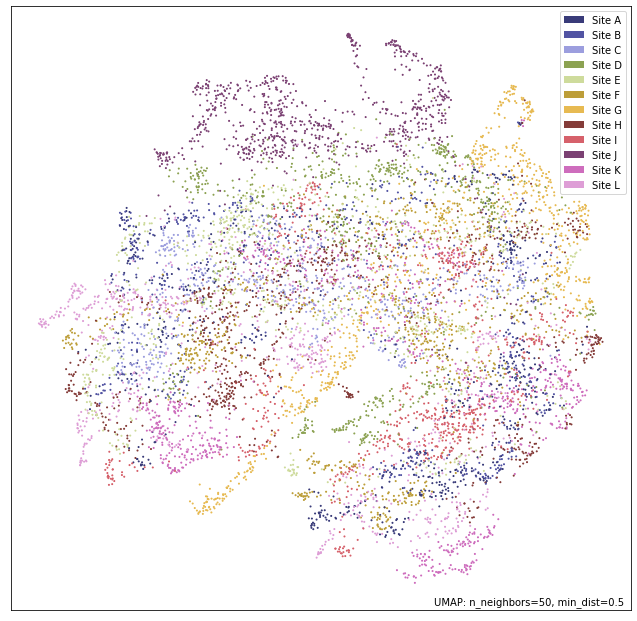

In [ ]:
# plot UMAP
umap.plot.points(mapper, labels=pretrained_df.Habitat, theme = 'red')

## Fully trained network

In [ ]:

# Uppload the csv of features and copy the path
fullytrained_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/trained_CNN_aus.csv'

data = pd.read_csv (fullytrained_path) #load dataframe
temp_df = data.reset_index() #put index in order
temp_df = temp_df.iloc[: , 2:] #remove unnecessary index
temp_df = temp_df.T #transpose to match indices format
temp_df = temp_df.reset_index() #re-add the index
fullytrained_df = temp_df.rename(columns={"index": "minute"})

# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[0][0:5]
    return t

class_type = []
for i in fullytrained_df['minute']:
  class_type.append(get_class(i))

# rename sites so they follow order on map more easily
new_names = ['Site A' if x=='SiteA' else x for x in class_type]
new_names = ['Site G' if x=='SiteB' else x for x in new_names]
new_names = ['Site D' if x=='SiteC' else x for x in new_names]
new_names = ['Site E' if x=='SiteD' else x for x in new_names]
new_names = ['Site B' if x=='SiteE' else x for x in new_names]
new_names = ['Site I' if x=='SiteF' else x for x in new_names]
new_names = ['Site H' if x=='SiteG' else x for x in new_names]
new_names = ['Site L' if x=='SiteH' else x for x in new_names]
new_names = ['Site C' if x=='SiteI' else x for x in new_names]
new_names = ['Site F' if x=='SiteJ' else x for x in new_names]
new_names = ['Site J' if x=='SiteK' else x for x in new_names]
new_names = ['Site K' if x=='SiteL' else x for x in new_names]

fullytrained_df.insert(1, 'Habitat', new_names)

# Check the class column was added 
fullytrained_df.head(40)

,minute,Habitat,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,SiteJdeployment2.1677983769.181103032034.wav,Site F,0.011415,10.289283,0.000000,7.256893,1.295557,0.000000,0.000000,18.542894,...,0.420960,0.017480,4.076290,0.000000,0.000000,0.202933,0.843459,0.000000,0.158123,1.249514
1,SiteAdeployment1.805322778.181023172733.wav,Site A,0.000000,15.645812,0.883047,4.936174,0.729615,0.000000,0.812924,1.675555,...,0.000000,0.323658,0.013336,0.000000,0.294935,0.021129,7.113554,0.000000,1.237369,0.036465
2,SiteIdeployment2.805322778.181102073302.wav,Site C,0.303400,10.904243,3.007330,0.043125,7.771619,0.000000,0.913815,1.154913,...,0.055531,0.000000,0.000000,0.027132,3.051994,1.315529,11.504429,0.002753,0.055960,3.387733
3,SiteDdeployment4.805322778.181123173922.wav,Site E,0.000000,17.460434,0.002275,3.685592,4.593746,0.023709,0.074226,5.876309,...,0.000000,4.294450,0.918361,0.618396,1.253748,0.623302,5.469021,0.000000,4.070124,0.000000
4,SiteEdeployment6.1677983769.181209085140.wav,Site B,0.422065,8.544225,0.009086,2.017138,4.957919,0.084011,6.327863,8.813068,...,0.018185,0.018330,0.066417,0.862620,0.000000,3.120564,6.191011,0.031814,1.907597,8.696228
5,SiteBdeployment5.1677983769.181201071827.wav,Site G,1.223899,10.373435,0.000000,5.740677,6.125507,3.783882,1.655980,2.684944,...,0.050977,0.000000,0.217532,0.156455,0.670688,5.363922,5.922828,0.000000,2.551788,1.078198
6,SiteIdeployment2.805322778.181102062302.wav,Site C,0.310074,10.151890,2.714696,0.026785,7.386988,0.000000,1.589653,0.998048,...,0.110380,0.000000,0.000000,0.237377,2.709793,1.339741,9.502432,0.020866,0.353163,3.745991
7,SiteAdeployment6.805322778.181208200239.wav,Site A,0.000000,7.985122,0.000000,7.463294,1.406634,0.000000,2.038883,1.577258,...,0.000000,0.000000,0.169720,2.870732,0.793656,1.769272,2.468574,0.000000,15.004949,5.499966
8,SiteJdeployment3.1677983769.181110075705.wav,Site F,0.719422,9.616189,0.000000,8.666222,5.063313,0.117243,0.016884,17.091463,...,0.883278,0.011976,3.400477,0.000000,0.000000,2.113250,3.245694,0.000000,0.747485,0.399263
9,SiteKdeployment6.1677983769.181206102224.wav,Site J,0.000000,16.282484,0.009272,2.994470,17.803320,0.000000,0.016763,1.296118,...,0.000000,0.000000,0.000000,1.912631,0.000000,3.867950,10.788615,0.000000,11.580277,4.320586


In [ ]:
#####create standard plot in viewer 
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(fullytrained_df.iloc[:,2:130])

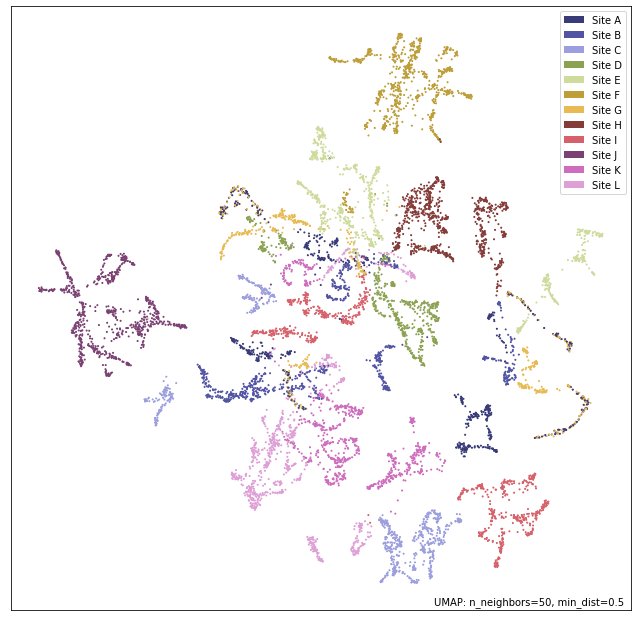

In [ ]:
#uses the 'habitat' column as the label
umap.plot.points(mapper, labels=fullytrained_df.Habitat, theme = 'red')

# **Indices high v Fish poor**

In [ ]:
# Uppload the csv of features and copy the path
indices_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/compound_index_aus.csv'

data = pd.read_csv (indices_path) #load dataframe
indices_df = data.reset_index() #put index in order
indices_df = indices_df.iloc[: , 2:] #remove unnecessary index

# remomve unwanted classes from DF
indices_df

,minute,fish_ACI,fish_ACI_std,fish_ADI,fish_ADI_std,fish_H,fish_H_std,fish_Hf,fish_Hf_std,fish_M,...,full_H,full_H_std,full_Hf,full_Hf_std,full_M,full_M_std,full_BI,full_BI_std,NDSI,NDSI_std
0,SiteJdeployment2.1677983769.181103032034.wav,179.372677,26.483996,2.192782,0.063717,0.999843,0.000144,0.481993,0.030042,0.000181,...,0.999930,0.000041,0.726764,0.019765,0.002191,0.000152,6.620203,1.060968,0.695277,0.157566
1,SiteAdeployment1.805322778.181023172733.wav,168.801850,25.504564,1.969023,0.395328,0.999686,0.000299,0.445248,0.056819,0.000152,...,0.999946,0.000034,0.733206,0.039498,0.000549,0.000051,3.684730,0.750008,0.547568,0.218633
2,SiteIdeployment2.805322778.181102073302.wav,174.988720,24.714481,2.197048,0.295056,0.999771,0.000238,0.497067,0.028419,0.000167,...,0.999944,0.000031,0.731974,0.035967,0.000685,0.000051,4.032168,1.002873,0.574645,0.199514
3,SiteDdeployment4.805322778.181123173922.wav,165.651071,17.444454,1.960197,0.139087,0.999693,0.000213,0.427126,0.043692,0.000141,...,0.999937,0.000035,0.743762,0.024463,0.000573,0.000035,4.024412,0.804414,0.557476,0.186468
4,SiteEdeployment6.1677983769.181209085140.wav,180.360927,20.778196,2.119658,0.095857,0.999758,0.000208,0.465938,0.038046,0.000213,...,0.999944,0.000028,0.751055,0.020132,0.000948,0.000076,3.399768,0.976760,0.596916,0.143404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8970,SiteEdeployment4.1677983769.181123193512.wav,184.233526,22.297484,2.228646,0.043271,0.999820,0.000127,0.480210,0.036195,0.000186,...,0.999951,0.000024,0.742654,0.024411,0.001071,0.000087,4.076686,1.297506,0.571016,0.148354
8971,SiteBdeployment2.1678278701.181031081236.wav,182.347518,22.123627,2.138060,0.400734,0.999841,0.000106,0.497224,0.024994,0.000148,...,0.999947,0.000027,0.738500,0.025675,0.000756,0.000057,4.360228,1.096501,0.564474,0.149877
8972,SiteFdeployment1.805322778.181024160925.wav,169.744011,18.668109,1.920811,0.148186,0.999577,0.000351,0.422345,0.050649,0.000136,...,0.999957,0.000042,0.736660,0.042460,0.000351,0.000034,4.295832,0.988247,0.516021,0.216831
8973,SiteHdeployment2.805322778.181103064253.wav,172.621364,20.334057,2.113102,0.305195,0.999707,0.000298,0.448852,0.063027,0.000280,...,0.999914,0.000064,0.738087,0.059790,0.000930,0.000091,3.034830,0.899003,0.373618,0.247484


In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[0][0:5]
    return t

class_type = []
for i in indices_df['minute']:
  class_type.append(get_class(i))
  
  
 # if get_class(i) == 'D':
  #  class_type.append('Degraded')
  #if get_class(i) == 'H':
   # class_type.append('Healthy')

indices_df.insert(1, 'Habitat', class_type)

# Check the class column was added 
indices_df.head()

,minute,Habitat,fish_ACI,fish_ACI_std,fish_ADI,fish_ADI_std,fish_H,fish_H_std,fish_Hf,fish_Hf_std,...,full_H,full_H_std,full_Hf,full_Hf_std,full_M,full_M_std,full_BI,full_BI_std,NDSI,NDSI_std
0,SiteJdeployment2.1677983769.181103032034.wav,SiteJ,179.372677,26.483996,2.192782,0.063717,0.999843,0.000144,0.481993,0.030042,...,0.999930,0.000041,0.726764,0.019765,0.002191,0.000152,6.620203,1.060968,0.695277,0.157566
1,SiteAdeployment1.805322778.181023172733.wav,SiteA,168.801850,25.504564,1.969023,0.395328,0.999686,0.000299,0.445248,0.056819,...,0.999946,0.000034,0.733206,0.039498,0.000549,0.000051,3.684730,0.750008,0.547568,0.218633
2,SiteIdeployment2.805322778.181102073302.wav,SiteI,174.988720,24.714481,2.197048,0.295056,0.999771,0.000238,0.497067,0.028419,...,0.999944,0.000031,0.731974,0.035967,0.000685,0.000051,4.032168,1.002873,0.574645,0.199514
3,SiteDdeployment4.805322778.181123173922.wav,SiteD,165.651071,17.444454,1.960197,0.139087,0.999693,0.000213,0.427126,0.043692,...,0.999937,0.000035,0.743762,0.024463,0.000573,0.000035,4.024412,0.804414,0.557476,0.186468
4,SiteEdeployment6.1677983769.181209085140.wav,SiteE,180.360927,20.778196,2.119658,0.095857,0.999758,0.000208,0.465938,0.038046,...,0.999944,0.000028,0.751055,0.020132,0.000948,0.000076,3.399768,0.976760,0.596916,0.143404


In [ ]:
# Remove the 4 sites not being used for fish habitat comparison
indices_df.drop(indices_df.index[indices_df['Habitat'] == 'SiteC'], inplace=True)
indices_df.drop(indices_df.index[indices_df['Habitat'] == 'SiteD'], inplace=True)
indices_df.drop(indices_df.index[indices_df['Habitat'] == 'SiteE'], inplace=True)
indices_df.drop(indices_df.index[indices_df['Habitat'] == 'SiteI'], inplace=True)

# Rename the renaming sites to High or Fish poor
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteA'],'Fish poor')
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteB'],'Fish poor')
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteG'],'Fish poor')
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteJ'],'Fish poor')

indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteF'],'Fish rich')
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteH'],'Fish rich')
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteK'],'Fish rich')
indices_df['Habitat'] = indices_df['Habitat'].replace(['SiteL'],'Fish rich')

indices_df.head()

,minute,Habitat,fish_ACI,fish_ACI_std,fish_ADI,fish_ADI_std,fish_H,fish_H_std,fish_Hf,fish_Hf_std,...,full_H,full_H_std,full_Hf,full_Hf_std,full_M,full_M_std,full_BI,full_BI_std,NDSI,NDSI_std
0,SiteJdeployment2.1677983769.181103032034.wav,Fish poor,179.372677,26.483996,2.192782,0.063717,0.999843,0.000144,0.481993,0.030042,...,0.999930,0.000041,0.726764,0.019765,0.002191,0.000152,6.620203,1.060968,0.695277,0.157566
1,SiteAdeployment1.805322778.181023172733.wav,Fish poor,168.801850,25.504564,1.969023,0.395328,0.999686,0.000299,0.445248,0.056819,...,0.999946,0.000034,0.733206,0.039498,0.000549,0.000051,3.684730,0.750008,0.547568,0.218633
5,SiteBdeployment5.1677983769.181201071827.wav,Fish poor,175.991643,20.887505,2.067315,0.143728,0.999749,0.000232,0.453967,0.057671,...,0.999950,0.000029,0.736850,0.028800,0.001101,0.000129,4.278120,0.978240,0.580337,0.142176
7,SiteAdeployment6.805322778.181208200239.wav,Fish poor,181.623479,22.365652,2.178056,0.149959,0.999835,0.000163,0.488024,0.038268,...,0.999924,0.000050,0.750360,0.015946,0.001342,0.000162,4.511504,1.068721,0.629611,0.125260
8,SiteJdeployment3.1677983769.181110075705.wav,Fish poor,178.154917,24.206607,2.194177,0.075626,0.999790,0.000179,0.464995,0.045202,...,0.999929,0.000060,0.740933,0.022895,0.001517,0.000112,4.166993,1.360326,0.666806,0.128720


In [ ]:
# create umap
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(indices_df.iloc[:,2:40])

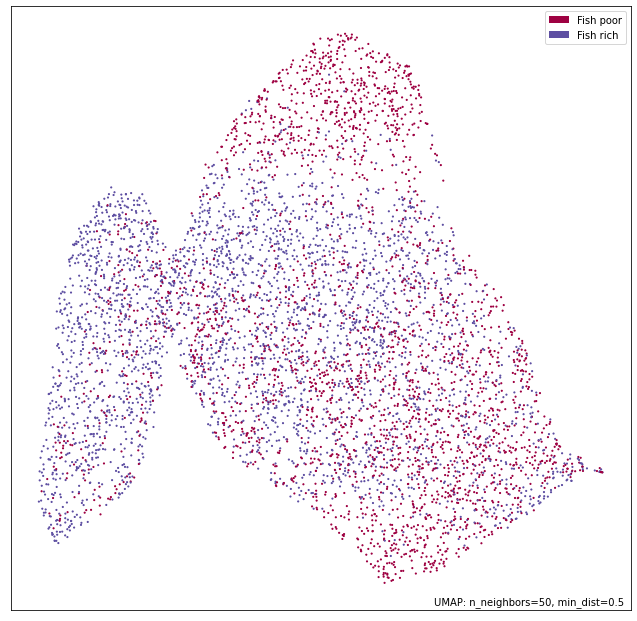

In [ ]:
# plot it
umap.plot.points(mapper, labels=indices_df.Habitat)#, theme = 'viridis')

# **Pretrained split by Fish**

In [ ]:
# Uppload the csv of features and copy the path
pretrained_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/pretrained_CNN_aus.csv'

data = pd.read_csv (pretrained_path) #load dataframe
temp_df = data.reset_index() #put index in order
temp_df = temp_df.iloc[: , 2:] #remove unnecessary index
temp_df = temp_df.T #transpose to match indices format
temp_df = temp_df.reset_index() #re-add the index
pretrained_df = temp_df.rename(columns={"index": "minute"})
#pretrained_df

In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[0][0:5]
    return t

class_type = []
for i in pretrained_df['minute']:
  class_type.append(get_class(i))

pretrained_df.insert(1, 'Habitat', class_type)

# Check the class column was added 
pretrained_df.head()

,minute,Habitat,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,SiteJdeployment2.1677983769.181103032034.wav,SiteJ,0.000929,0.093042,0.285380,0.210208,0.000000,0.0,0.0,0.006659,...,0.0,0.023046,0.000220,0.000000,0.000000,0.225300,0.304314,0.0,0.0,0.0
1,SiteAdeployment1.805322778.181023172733.wav,SiteA,0.030780,0.100007,0.408427,0.050889,0.000000,0.0,0.0,0.002414,...,0.0,0.060092,0.010739,0.000000,0.028925,0.244283,0.167082,0.0,0.0,0.0
2,SiteIdeployment2.805322778.181102073302.wav,SiteI,0.023870,0.043412,0.331813,0.121506,0.000000,0.0,0.0,0.000000,...,0.0,0.043277,0.000077,0.000000,0.016917,0.357364,0.186497,0.0,0.0,0.0
3,SiteDdeployment4.805322778.181123173922.wav,SiteD,0.039953,0.076123,0.304760,0.088957,0.001289,0.0,0.0,0.014608,...,0.0,0.078101,0.053534,0.001675,0.013040,0.177259,0.129732,0.0,0.0,0.0
4,SiteEdeployment6.1677983769.181209085140.wav,SiteE,0.005541,0.105616,0.485045,0.074837,0.000000,0.0,0.0,0.000000,...,0.0,0.056985,0.008627,0.000000,0.020391,0.282245,0.129462,0.0,0.0,0.0


In [ ]:
# Remove the 4 sites not being used for fish habitat comparison
pretrained_df.drop(pretrained_df.index[pretrained_df['Habitat'] == 'SiteC'], inplace=True)
pretrained_df.drop(pretrained_df.index[pretrained_df['Habitat'] == 'SiteD'], inplace=True)
pretrained_df.drop(pretrained_df.index[pretrained_df['Habitat'] == 'SiteE'], inplace=True)
pretrained_df.drop(pretrained_df.index[pretrained_df['Habitat'] == 'SiteI'], inplace=True)

# Rename the renaming sites to High or Fish poor
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteA'],'Fish poor')
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteB'],'Fish poor')
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteG'],'Fish poor')
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteJ'],'Fish poor')

pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteF'],'Fish rich')
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteH'],'Fish rich')
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteK'],'Fish rich')
pretrained_df['Habitat'] = pretrained_df['Habitat'].replace(['SiteL'],'Fish rich')

In [ ]:
# create umap
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(pretrained_df.iloc[:,2:130]) # may want to change params to .UMAP(n_neighbors=30, min_dist=0.5)

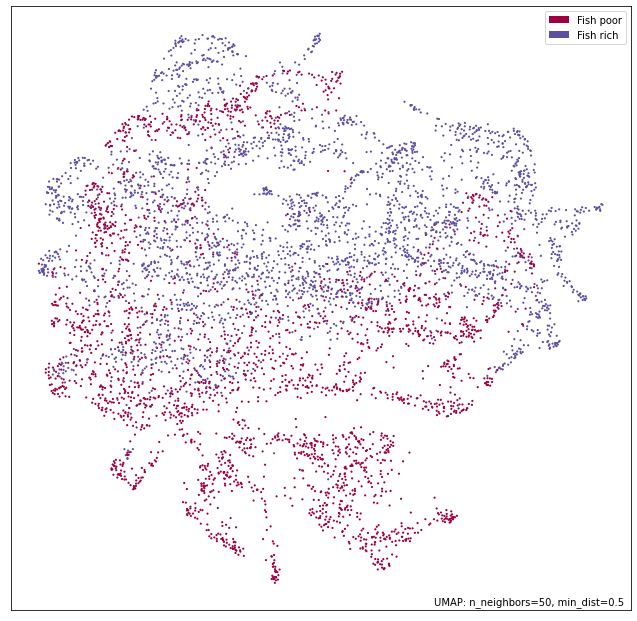

In [ ]:
# plot it
umap.plot.points(mapper, labels=pretrained_df.Habitat)#, theme = 'fire')#color_key_cmap=cmp, background='white')

# **Fully trained split by fish**

In [ ]:
# Uppload the csv of features and copy the path
fullytrained_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/trained_CNN_aus.csv'


data = pd.read_csv (fullytrained_path) #load dataframe
temp_df = data.reset_index() #put index in order
temp_df = temp_df.iloc[: , 2:] #remove unnecessary index
temp_df = temp_df.T #transpose to match indices format
temp_df = temp_df.reset_index() #re-add the index
fullytrained_df = temp_df.rename(columns={"index": "minute"})
#pretrained_df

In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[0][0:5]
    return t

class_type = []
for i in fullytrained_df['minute']:
  class_type.append(get_class(i))
  

fullytrained_df.insert(1, 'Habitat', class_type)

# Check the class column was added 
fullytrained_df.head()



# Remove the 4 sites not being used for fish habitat comparison
fullytrained_df.drop(fullytrained_df.index[fullytrained_df['Habitat'] == 'SiteC'], inplace=True)
fullytrained_df.drop(fullytrained_df.index[fullytrained_df['Habitat'] == 'SiteD'], inplace=True)
fullytrained_df.drop(fullytrained_df.index[fullytrained_df['Habitat'] == 'SiteE'], inplace=True)
fullytrained_df.drop(fullytrained_df.index[fullytrained_df['Habitat'] == 'SiteI'], inplace=True)

# Rename the renaming sites to High or Fish poor
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteA'],'Fish poor')
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteB'],'Fish poor')
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteG'],'Fish poor')
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteJ'],'Fish poor')

fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteF'],'Fish rich')
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteH'],'Fish rich')
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteK'],'Fish rich')
fullytrained_df['Habitat'] = fullytrained_df['Habitat'].replace(['SiteL'],'Fish rich')

In [ ]:
# create umap
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(fullytrained_df.iloc[:,2:130]) # may want to change params to .UMAP(n_neighbors=30, min_dist=0.5)

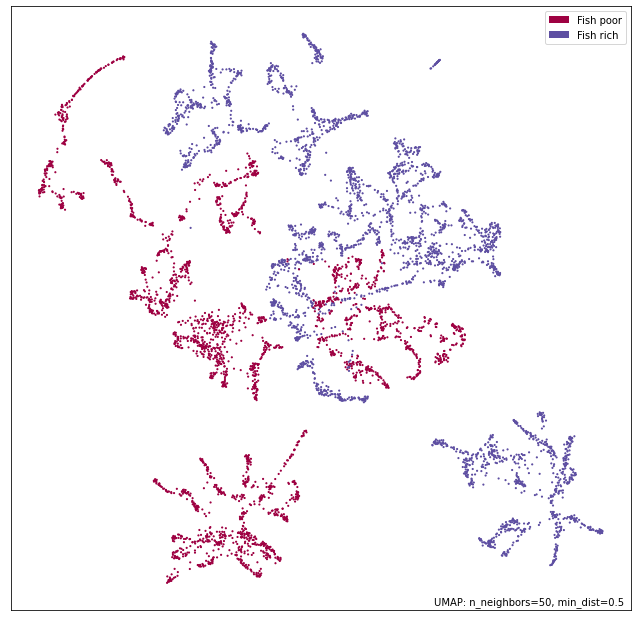

In [ ]:
# plot it
umap.plot.points(mapper, labels=fullytrained_df.Habitat)#, theme = 'inferno')